In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20201205_generator,
    explored_models_20201205_2_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [2]:
import pandas as pd

In [6]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
assert cc_max_all_neurons.shape == (79,)

In [7]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201205+20201205_2', 'main.pkl.buggy_card')
if not exists(f_main_result):
    makedirs(dirname(f_main_result), exist_ok=True)
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
        'multi_path': True,
        'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201205_generator(with_source=True, separate_bn_list=[True]),
            explored_models_20201205_2_generator(with_source=True, separate_bn_list=[True]),
        ),
        total_num_param=29,
        train_size_mapping={
            None: 5120,
        },
        no_missing_data=False,
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=79,
        skip_eval_json=True,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400


In [8]:
df_main_result

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          geD1            2         16          2           cm-avg       5120              0.612730   
                                                                                                     inst-avg     5120              0.629425   
                                                                                         3           cm-avg       5120              0.625702   
                                                                                                     inst-avg     5120              0.639502   
                                                                                         4           cm-avg       5120              0.232654   
...                                                                                                                                      ...   
softplus True                 poisson   1          leD6            2         32          7           inst-avg     5120                   NaN   
                                                   leD7            2         16          7           cm-avg       5120              0.648871   
                                                                                                     inst-avg     5120              0.654051   
                                                                             32          7           cm-avg       5120                   NaN   
                                                                                                     inst-avg     5120                   NaN   

                                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          geD1            2         16          2           cm-avg       5120           0.282988   
                                                                                                     inst-avg     5120           0.290298   
                                                                                         3           cm-avg       5120           0.289110   
                                                                                                     inst-avg     5120           0.294889   
                                                                                         4           cm-avg       5120           0.106993   
...                                                                                                                                   ...   
softplus True                 poisson   1          leD6            2         32          7           inst-avg     5120                NaN   
                                                   leD7            2         16          7           cm-avg       5120           0.298892   
                                                                                                     inst-avg     5120           0.300759   
                                                                             32          7           cm-avg       5120                NaN   
                                                                                                     inst-avg     5120                NaN   

                                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          geD1            2         16          2           cm-avg       5120          0.513442   

In [9]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          geD1            2         16          2           cm-avg       5120              0.612730   
                                                                                                     inst-avg     5120              0.629425   
                                                                                         3           cm-avg       5120              0.625702   
                                                                                                     inst-avg     5120              0.639502   
                                                                                         4           cm-avg       5120              0.232654   
...                                                                                                                                      ...   
softplus True                 poisson   1          leD6            2         16          7           inst-avg     5120              0.652027   
                                                                             32          6           cm-avg       5120              0.664651   
                                                                                                     inst-avg     5120              0.675939   
                                                   leD7            2         16          7           cm-avg       5120              0.648871   
                                                                                                     inst-avg     5120              0.654051   

                                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          geD1            2         16          2           cm-avg       5120           0.282988   
                                                                                                     inst-avg     5120           0.290298   
                                                                                         3           cm-avg       5120           0.289110   
                                                                                                     inst-avg     5120           0.294889   
                                                                                         4           cm-avg       5120           0.106993   
...                                                                                                                                   ...   
softplus True                 poisson   1          leD6            2         16          7           inst-avg     5120           0.299583   
                                                                             32          6           cm-avg       5120           0.305654   
                                                                                                     inst-avg     5120           0.310759   
                                                   leD7            2         16          7           cm-avg       5120           0.298892   
                                                                                                     inst-avg     5120           0.300759   

                                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          geD1            2         16          2           cm-avg       5120          0.513442   

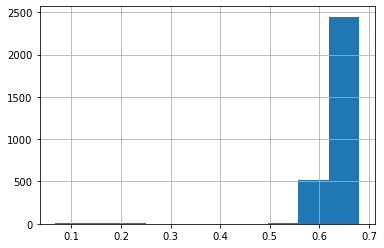

In [48]:
bbbbbbbb['cc2_normed_avg'].hist()

In [36]:
bbbbbbbb =  df_main_result.dropna()
bbbbbbbb[bbbbbbbb['cc2_normed_avg'] < 0.4]

cc2_normed_avg  \
act_fn ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu   False                mse       0          geD1            2         16          4           cm-avg       5120              0.232654   
                                                 leD1            2         16          3           cm-avg       5120              0.262706   
                                      1          geD4            2         16          4           inst-avg     5120              0.189810   
                            poisson   0          geD2            2         32          2           cm-avg       5120              0.176204   
                                                                                                   inst-avg     5120              0.160877   
                                                 geD3            2         32          3           cm-avg       5120              0.077806   
                                                                                                   inst-avg     5120              0.085015   
                                                 leD1            2         32          2           cm-avg       5120              0.181996   
                                                 leD2            2         16          2           inst-avg     5120              0.123557   
       True                 mse       0          geD4            2         32          4           cm-avg       5120              0.176025   
                                                 geD5            2         16          6           cm-avg       5120              0.212934   
                                                                           32          5           cm-avg       5120              0.203826   
                                                 geD6            2         32          6           cm-avg       5120              0.108194   
                                                 leD1            2         32          3           cm-avg       5120              0.191412   
                                      1          geD1            2         16          2           inst-avg     5120              0.088785   
                                                 geD3            2         16          3           inst-avg     5120              0.211247   
                                                                                       4           inst-avg     5120              0.184436   
                            poisson   0          geD2            2         16          3           cm-avg       5120              0.220273   
                                                 geD3            2         32          3           cm-avg       5120              0.192533   
                                                 geD4            2         32          4           inst-avg     5120              0.162929   
                                                 geD5            2         32          5           cm-avg       5120              0.153073   
                                      1          geD2            2         32          2           inst-avg     5120              0.066767   

                                                                                                                            cc2_raw_avg  \
act_fn ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu   False                mse       0          geD1            2         16          4           cm-avg       5120           0.106993   
                                                 leD1            2         16          3           cm-avg       5120           0.120441   
                                      1          geD4            2         16          4           inst-avg     5120           0.086839   
                    

In [ ]:
df_main_result_original['']

In [10]:
df_main_result_original = df_main_result.dropna().xs('geD1', level='multi_path_hack')

In [11]:
df_main_result_original

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         16          2           cm-avg       5120              0.612730   
                                                                                     inst-avg     5120              0.629425   
                                                                         3           cm-avg       5120              0.625702   
                                                                                     inst-avg     5120              0.639502   
                                                                         4           cm-avg       5120              0.232654   
...                                                                                                                      ...   
softplus True                 poisson   1          2         32          2           inst-avg     5120              0.634493   
                                                                         3           inst-avg     5120              0.654082   
                                                                         4           inst-avg     5120              0.662910   
                                                                         5           inst-avg     5120              0.668411   
                                                                         6           inst-avg     5120              0.675939   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         16          2           cm-avg       5120           0.282988   
                                                                                     inst-avg     5120           0.290298   
                                                                         3           cm-avg       5120           0.289110   
                                                                                     inst-avg     5120           0.294889   
                                                                         4           cm-avg       5120           0.106993   
...                                                                                                                   ...   
softplus True                 poisson   1          2         32          2           inst-avg     5120           0.291906   
                                                                         3           inst-avg     5120           0.300663   
                                                                         4           inst-avg     5120           0.304830   
                                                                         5           inst-avg     5120           0.307191   
                                                                         6           inst-avg     5120           0.310759   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         16          2           cm-avg       5120          0.513442   
                                                                                     inst-avg     5120          0.521179   
                                                                         3           cm-avg       5120          0.519397   
                                                                                     inst-avg     5120          0.525229   
                                                                         4 

In [12]:
# take main results and compare
f_ref_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_ref = pd.read_pickle(f_ref_result)

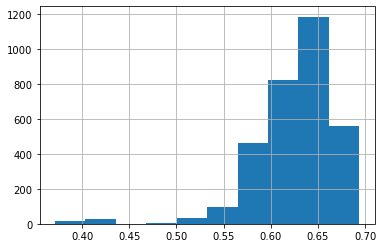

In [46]:
df_main_result_ref.xs(5120, level='train_keep')['cc2_normed_avg'].hist()

In [13]:
aaaa = df_main_result_ref.join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

from scipy.stats import pearsonr, spearmanr

In [17]:
# try to replicate results in 
# 20201114_collect-separatebn.ipynb
# and
# 20201118_collect-separatebn.ipynb
def compute_correlations():
    # 5120
    plt.close('all')
    fig, axes = plt.subplots(nrows=1, ncols=4, squeeze=True, figsize=(20, 10), sharex=True, sharey=True)
    axes = axes.ravel()
    aaaaaa = aaaa.xs(5120, level='train_keep')
    idx_ax = -1
    for idx1, train_keep in enumerate(aaaaaa.index.get_level_values('out_channel').unique()):
        bbb = aaaaaa.xs(train_keep, level='out_channel')
        for idx2, num_layer in enumerate(bbb.index.get_level_values('num_layer').unique()):
            bb = bbb.xs(num_layer, level='num_layer')
            for idx3, readout_type in enumerate( bb.index.get_level_values('readout_type').unique()):
                idx_ax += 1
                ax = axes[idx_ax]
                b = bb.xs(readout_type, level='readout_type')
                n = b.shape[0]
                r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                r_spearman = spearmanr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                           label='ch {}, num_l {}, {}, n={}, r={:.2f}/{:.2f}'.format(
                               train_keep, num_layer, readout_type, n, r, r_spearman
                           )
                          )
                
                ax.set_xlabel('ref')
                ax.set_ylabel('new')
                ax.plot([0.5,0.75],[0.5,0.75],linestyle='--',color='k')
                ax.legend()

                # compute pearson
                print(train_keep, num_layer, readout_type)
        
        
    
    plt.show()

16 2 cm-avg
16 2 inst-avg
32 2 cm-avg
32 2 inst-avg


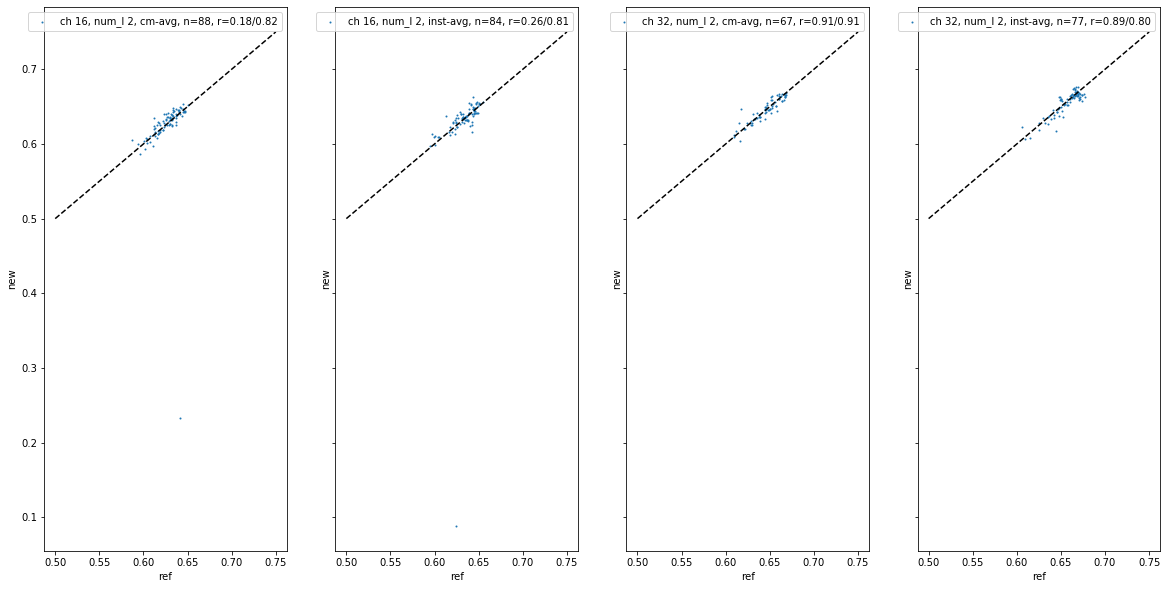

In [18]:
compute_correlations()

In [22]:
# take results from 
# 20201114_collect-separatebn.ipynb and 20201118_collect-separatebn.ipynb
# and compare
df_main_result_ref2 = pd.concat(
    [
        pd.read_pickle(join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201118', 'main_result_separatebn.pkl')),
        pd.read_pickle(join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201114', 'main_result_separatebn.pkl')),
    ], axis=0
).dropna()
     

In [23]:
df_main_result_ref2

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       1280              0.379478   
                                                                                                  2560              0.543094   
                                                                                                  5120              0.580530   
                                                                                     cm-last      1280              0.401936   
                                                                                                  2560              0.573986   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560              0.637329   
                                                                                                  5120              0.679273   
                                                                                     inst-last    1280              0.414699   
                                                                                                  2560              0.594899   
                                                                                                  5120              0.667413   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           cm-avg       1280           0.181373   
                                                                                                  2560           0.253170   
                                                                                                  5120           0.268277   
                                                                                     cm-last      1280           0.192658   
                                                                                                  2560           0.267190   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560           0.294164   
                                                                                                  5120           0.312190   
                                                                                     inst-last    1280           0.197021   
                                                                                                  2560           0.276591   
                                                                                                  5120           0.307430   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           cm-avg       1280          0.389241   
                                                                                                  2560          0.481323   
                                                                                                  5120          0.498672   
                                                                                     cm-last      1280          0.407067   
                                                                           

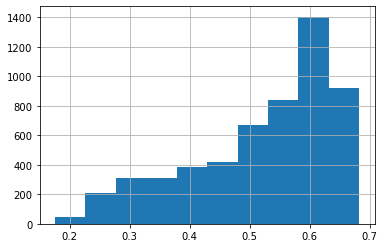

In [44]:
df_main_result_ref2['cc2_normed_avg']

In [24]:
aaaa = df_main_result_ref2.join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

In [25]:
aaaa

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
softplus True                 mse       0          2         32          6           inst-avg     5120                  0.656286   
relu     True                 poisson   1          2         32          4           cm-avg       5120                  0.646699   
softplus False                poisson   0          2         32          6           inst-avg     5120                  0.674577   
                                        1          2         16          4           inst-avg     5120                  0.643131   
relu     True                 poisson   1          2         16          7           cm-avg       5120                  0.640179   
...                                                                                                                          ...   
softplus False                mse       1          2         16          6           cm-avg       5120                  0.633347   
relu     True                 poisson   1          2         32          6           cm-avg       5120                  0.658961   
softplus False                poisson   0          2         16          2           cm-avg       5120                  0.613009   
                              mse       0          2         16          3           cm-avg       5120                  0.597591   
relu     True                 poisson   0          2         16          4           cm-avg       5120                  0.632472   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
softplus True                 mse       0          2         32          6           inst-avg     5120               0.302085   
relu     True                 poisson   1          2         32          4           cm-avg       5120               0.297413   
softplus False                poisson   0          2         32          6           inst-avg     5120               0.310632   
                                        1          2         16          4           inst-avg     5120               0.296419   
relu     True                 poisson   1          2         16          7           cm-avg       5120               0.294271   
...                                                                                                                       ...   
softplus False                mse       1          2         16          6           cm-avg       5120               0.292000   
relu     True                 poisson   1          2         32          6           cm-avg       5120               0.303517   
softplus False                poisson   0          2         16          2           cm-avg       5120               0.282115   
                              mse       0          2         16          3           cm-avg       5120               0.275762   
relu     True                 poisson   0          2         16          4           cm-avg       5120               0.291793   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
softplus True                 mse       0          2         32          6           inst-avg     5120              0.533688   
relu     True                 poisson   1          2         32          4           cm-avg       5120              0.528503   
softplus False                poisson   0          2         32          6           inst-avg     5120              0.540958   
                                        1          2         16          4 

32 2 inst-avg
32 2 cm-avg
16 2 inst-avg
16 2 cm-avg


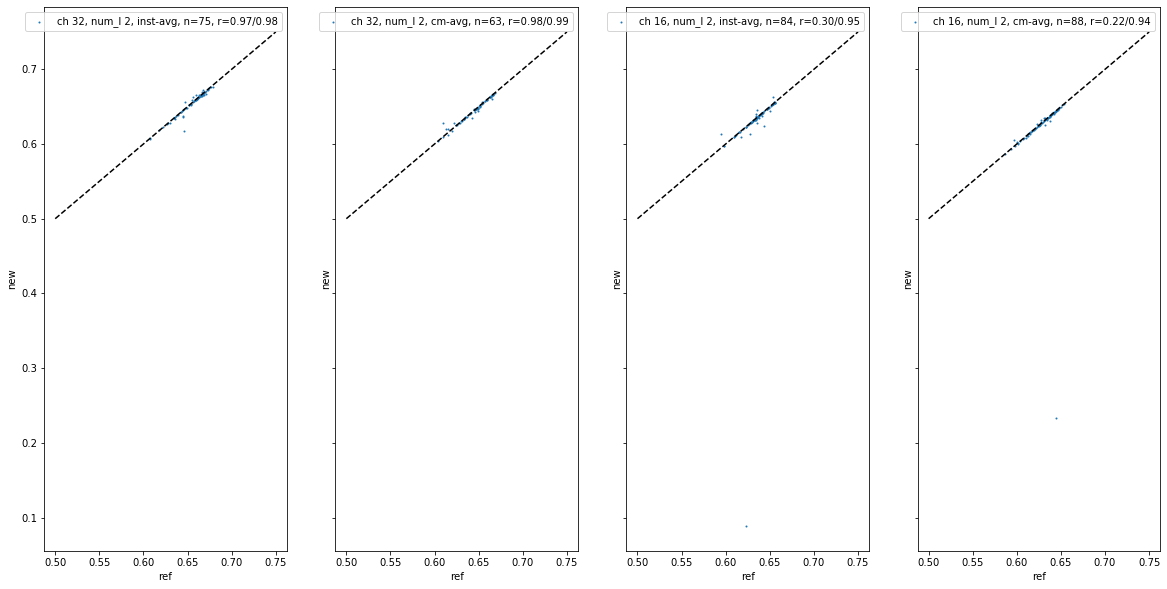

In [26]:
compute_correlations()
# card to card variation... interesting.

In [27]:
aaaa[aaaa['cc2_normed_avg_new'] < 0.4]

cc2_normed_avg_ref  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu   False                mse       0          2         16          4           cm-avg       5120                  0.644860   
       True                 mse       1          2         16          2           inst-avg     5120                  0.623499   

                                                                                                            cc2_raw_avg_ref  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
relu   False                mse       0          2         16          4           cm-avg       5120               0.297257   
       True                 mse       1          2         16          2           inst-avg     5120               0.286894   

                                                                                                            cc_raw_avg_ref  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu   False                mse       0          2         16          4           cm-avg       5120              0.527910   
       True                 mse       1          2         16          2           inst-avg     5120              0.518508   

                                                                                                            num_param_ref  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                  
relu   False                mse       0          2         16          4           cm-avg       5120                23421   
       True                 mse       1          2         16          2           inst-avg     5120                22893   

                                                                                                            cc2_normed_avg_new  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu   False                mse       0          2         16          4           cm-avg       5120                  0.232654   
       True                 mse       1          2         16          2           inst-avg     5120                  0.088785   

                                                                                                            cc2_raw_avg_new  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
relu   False                mse       0          2         16          4           cm-avg       5120               0.106993   
       True                 mse       1          2         16          2           inst-avg     5120               0.041266   

                                                                                                            cc_raw_avg_new  \
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu   False                mse       0          2         16          4           cm-avg       5120              0.305974   
       True                 mse       1          2         16          2           inst-avg     5120              0.122759   

                                                                                                            num_param_new  
act_fn ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                 
relu   False                mse       0          2         16          4           cm-avg       5120                23421  
       True                 mse       1          2         16          2           inst-avg     5120                22893

In [29]:
aaaa[aaaa['cc2_normed_avg_new'] >0.5]

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
softplus True                 mse       0          2         32          6           inst-avg     5120                  0.656286   
relu     True                 poisson   1          2         32          4           cm-avg       5120                  0.646699   
softplus False                poisson   0          2         32          6           inst-avg     5120                  0.674577   
                                        1          2         16          4           inst-avg     5120                  0.643131   
relu     True                 poisson   1          2         16          7           cm-avg       5120                  0.640179   
...                                                                                                                          ...   
softplus False                mse       1          2         16          6           cm-avg       5120                  0.633347   
relu     True                 poisson   1          2         32          6           cm-avg       5120                  0.658961   
softplus False                poisson   0          2         16          2           cm-avg       5120                  0.613009   
                              mse       0          2         16          3           cm-avg       5120                  0.597591   
relu     True                 poisson   0          2         16          4           cm-avg       5120                  0.632472   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
softplus True                 mse       0          2         32          6           inst-avg     5120               0.302085   
relu     True                 poisson   1          2         32          4           cm-avg       5120               0.297413   
softplus False                poisson   0          2         32          6           inst-avg     5120               0.310632   
                                        1          2         16          4           inst-avg     5120               0.296419   
relu     True                 poisson   1          2         16          7           cm-avg       5120               0.294271   
...                                                                                                                       ...   
softplus False                mse       1          2         16          6           cm-avg       5120               0.292000   
relu     True                 poisson   1          2         32          6           cm-avg       5120               0.303517   
softplus False                poisson   0          2         16          2           cm-avg       5120               0.282115   
                              mse       0          2         16          3           cm-avg       5120               0.275762   
relu     True                 poisson   0          2         16          4           cm-avg       5120               0.291793   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
softplus True                 mse       0          2         32          6           inst-avg     5120              0.533688   
relu     True                 poisson   1          2         32          4           cm-avg       5120              0.528503   
softplus False                poisson   0          2         32          6           inst-avg     5120              0.540958   
                                        1          2         16          4 